In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

master = pd.read_csv("../data/processed/bihar2025_master_dataset.csv")
seats_per_party = (
    master[master["Status"] == "won"]
    .groupby("Party")["AC_NO"]
    .nunique()
    .rename("Seats_Won")
)

# Merge seats won back into master
master = master.merge(seats_per_party, on="Party", how="left")
master["Seats_Won"] = master["Seats_Won"].fillna(0).astype(int)
master.head()

,AC_NO,AC_NAME,Candidate,Party,Votes,Margin,Status,Total_Votes_Polled,DISTRICT,GENERAL_SC,...,Is_Multi_Cornered,Party_Total_Votes,Party_Vote_Share_%,Party_Constituencies_Contested,Party_Seats_Won,Party_Conversion_Percentage,Wasted_Votes,Effective_Votes,Votes_per_Seat,Seats_Won
0,1,Valmiki Nagar,SURENDRA PRASAD,Indian National Congress,107730,1675,won,233632,PASCHIM CHAMPARAN,GENERAL,...,0,4374579,8.712959,61,6,9.84,0,107730,729096.5,6
1,1,Valmiki Nagar,DHIRENDRA PRATAP SINGH ALIAS RINKU SINGH,Janata Dal (United),106055,-1675,lost,233632,PASCHIM CHAMPARAN,GENERAL,...,0,9667118,19.254241,101,85,84.16,106055,0,113730.8,85
2,1,Valmiki Nagar,RAMESHWAR YADAV,Bahujan Samaj Party,5312,-102418,lost,233632,PASCHIM CHAMPARAN,GENERAL,...,0,813553,1.620374,181,1,0.55,5312,0,813553.0,1
3,1,Valmiki Nagar,MAHMAD JALIL,Independent,2426,-105304,lost,233632,PASCHIM CHAMPARAN,GENERAL,...,0,2516297,5.011772,232,0,0.00,2426,0,inf,0
4,1,Valmiki Nagar,RAJESH SHARMA,Lok Samaj Party,2303,-105427,lost,233632,PASCHIM CHAMPARAN,GENERAL,...,0,2303,0.004587,1,0,0.00,2303,0,inf,0


In [38]:
print("Rows:", len(master))
print("Columns:", master.shape[1])
print("\nColumns List:")
print(master.columns)

master.describe(include='all').T

Rows: 2859
Columns: 30

Columns List:
Index(['AC_NO', 'AC_NAME', 'Candidate', 'Party', 'Votes', 'Margin', 'Status',
       'Total_Votes_Polled', 'DISTRICT', 'GENERAL_SC',
       'Total_Votes_Per_District', 'Margin_Bucket', '<500', '0.5-2K', '2_10K',
       '10_25K', '25_50K', '50K_plus', 'Multi_Cornered_Count', 'Vote_Percent',
       'Is_Multi_Cornered', 'Party_Total_Votes', 'Party_Vote_Share_%',
       'Party_Constituencies_Contested', 'Party_Seats_Won',
       'Party_Conversion_Percentage', 'Wasted_Votes', 'Effective_Votes',
       'Votes_per_Seat', 'Seats_Won'],
      dtype='object')


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning:

invalid value encountered in subtract



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AC_NO,2859.0,NaN,NaN,NaN,127.16929,69.288547,1.0,68.0,128.0,189.0,243.0
AC_NAME,2859,241,Pipra,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Candidate,2859,2268,NOTA,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Party,2859,163,Independent,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Votes,2859.0,NaN,NaN,NaN,17561.29171,33058.819081,90.0,968.5,2276.0,6187.5,140608.0
Margin,2859.0,NaN,NaN,NaN,-78733.429871,39968.667264,-140118.0,-103374.5,-90780.0,-75521.0,73572.0
Status,2616,2,lost,2373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Votes_Polled,2859.0,NaN,NaN,NaN,206934.330885,23294.719988,144414.0,190800.0,205223.0,223746.0,277074.0
DISTRICT,2804,38,PATNA,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENERAL_SC,2804,2,GENERAL,2447,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
alliance_map = {
    "Bharatiya Janata Party": "NDA",
    "Janata Dal (United)": "NDA",
    "Lok Janshakti Party (RV)": "NDA",

    "Rashtriya Janata Dal": "INDIA",
    "Indian National Congress": "INDIA",
    "CPI(ML)(L)": "INDIA",
    "CPI(M)": "INDIA",

    "AIMIM": "OTHERS",
    "BSP": "OTHERS",
    "Independent": "OTHERS",
}

# Alliance colors
alliance_colors = {
    "NDA": "#FF8C00",      # Blue
    "INDIA": "#1E90FF",    # Red
    "OTHERS": "#8c564b",   # Brown
}

In [64]:
TOP_N = 12  

total_votes_state = master["Votes"].sum()
total_seats = master[master["Status"] == "won"]["AC_NO"].nunique()

party_votes = (
    master.groupby("Party")["Votes"].sum()
    .sort_values(ascending=False)
    .reset_index()
)

seats_per_party = (
    master[master["Status"] == "won"]
    .groupby("Party")["AC_NO"]
    .nunique()
    .rename("Seats_Won")
)

# Filter top N
party_votes_topN = party_votes.head(TOP_N).copy()

# Add alliance column
party_votes_topN["Alliance"] = party_votes_topN["Party"].map(alliance_map).fillna("OTHERS")

# Add color column
party_votes_topN["Color"] = party_votes_topN["Alliance"].map(alliance_colors)

# Truncate long party names
party_votes_topN["Party_Display"] = party_votes_topN["Party"].apply(
    lambda x: x if len(x) <= 40 else x[:40] + "..."
)

party_votes_topN["Vote_Share_%"] = (
    party_votes_topN["Votes"] / total_votes_state * 100
)

party_votes_topN = party_votes_topN.merge(
    seats_per_party, 
    on="Party", 
    how="left"
)

party_votes_topN["Seats_Won"] = party_votes_topN["Seats_Won"].fillna(0).astype(int)


party_votes_topN["Seat_Share_%"] = (
    party_votes_topN["Seats_Won"] / total_seats * 100
)

party_votes_topN

,Party,Votes,Alliance,Color,Party_Display,Vote_Share_%,Seats_Won,Seat_Share_%
0,Rashtriya Janata Dal,11546055,INDIA,blue,Rashtriya Janata Dal,22.996567,25,10.288066
1,Bharatiya Janata Party,10081143,NDA,orange,Bharatiya Janata Party,20.078865,89,36.625514
2,Janata Dal (United),9667118,NDA,orange,Janata Dal (United),19.254241,85,34.979424
3,Indian National Congress,4374579,INDIA,blue,Indian National Congress,8.712959,6,2.469136
4,Independent,2516297,OTHERS,gray,Independent,5.011772,0,0.000000
5,Lok Janshakti Party (Ram Vilas),2497358,OTHERS,gray,Lok Janshakti Party (Ram Vilas),4.974051,19,7.818930
6,Jan Suraaj Party,1677583,OTHERS,gray,Jan Suraaj Party,3.341284,0,0.000000
7,Communist Party of India (Marxist-Leninist) (L...,1425592,OTHERS,gray,Communist Party of India (Marxist-Lenini...,2.839387,2,0.823045
8,All India Majlis-E-Ittehadul Muslimeen,930504,OTHERS,gray,All India Majlis-E-Ittehadul Muslimeen,1.853308,5,2.057613
9,None of the Above,910730,OTHERS,gray,None of the Above,1.813924,0,0.000000


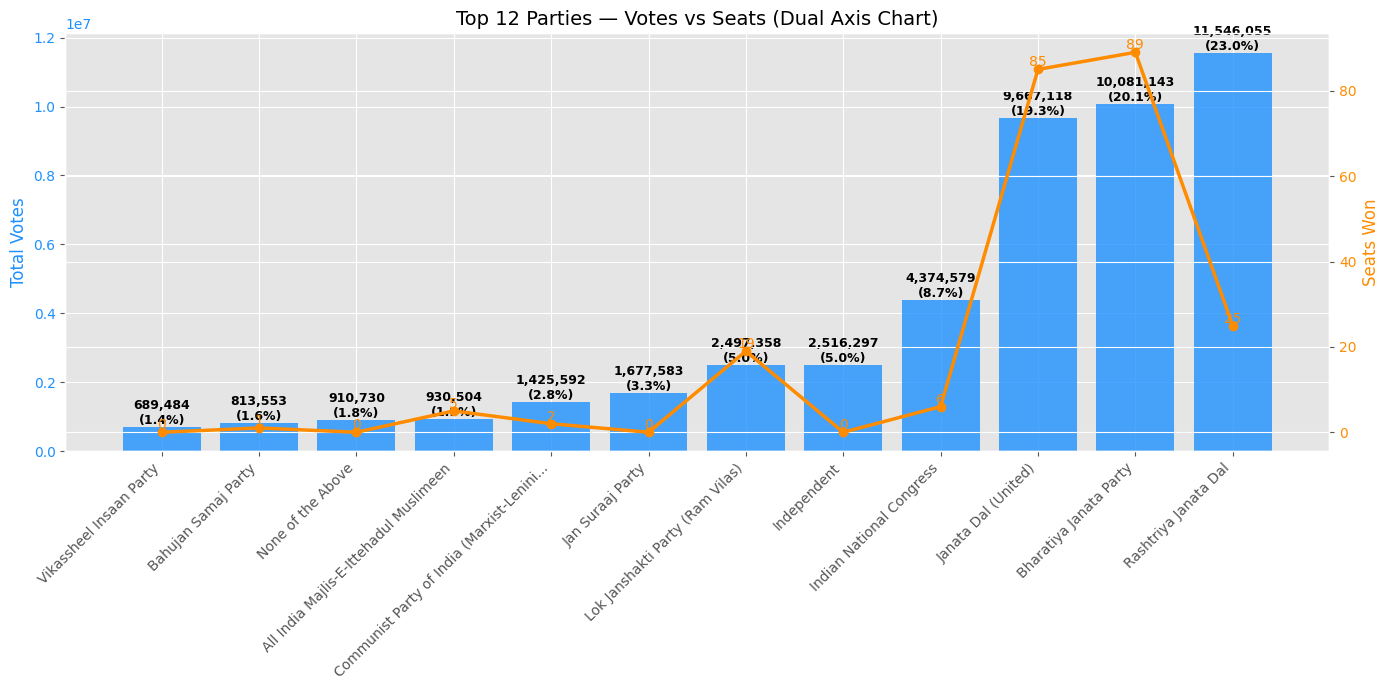

In [72]:
party_votes_topN = party_votes_topN.sort_values("Votes", ascending=True)

fig, ax1 = plt.subplots(figsize=(14, 7))

# --- BAR CHART (Votes) ---
bars = ax1.bar(
    party_votes_topN["Party_Display"],
    party_votes_topN["Votes"],
    color="#1E90FF",      # blue
    alpha=0.8,
    label="Votes"
)

ax1.set_ylabel("Total Votes", color="#1E90FF")
ax1.tick_params(axis="y", labelcolor="#1E90FF")
plt.xticks(rotation=45, ha="right")

# Annotate vote numbers
for bar, votes, vote_share in zip(
    bars,
    party_votes_topN["Votes"],
    party_votes_topN["Vote_Share_%"]
):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{votes:,}\n({vote_share:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
        fontweight="bold"
    )

# --- LINE CHART (Seats) ---
ax2 = ax1.twinx()
ax2.plot(
    party_votes_topN["Party_Display"],
    party_votes_topN["Seats_Won"],
    color="#FF8C00",      # orange
    marker="o",
    linewidth=2.5,
    label="Seats Won"
)

ax2.set_ylabel("Seats Won", color="#FF8C00")
ax2.tick_params(axis="y", labelcolor="#FF8C00")

# Annotate seat numbers on the line
for x, seats in enumerate(party_votes_topN["Seats_Won"]):
    ax2.text(
        x,
        seats,
        seats,
        color="#FF8C00",
        fontsize=10,
        ha="center",
        va="bottom"
    )

plt.title(f"Top {TOP_N} Parties — Votes vs Seats (Dual Axis Chart)", fontsize=14)
plt.tight_layout()
plt.show()
fig.savefig("../visuals/vote_share_bar.png", dpi=300, bbox_inches="tight")

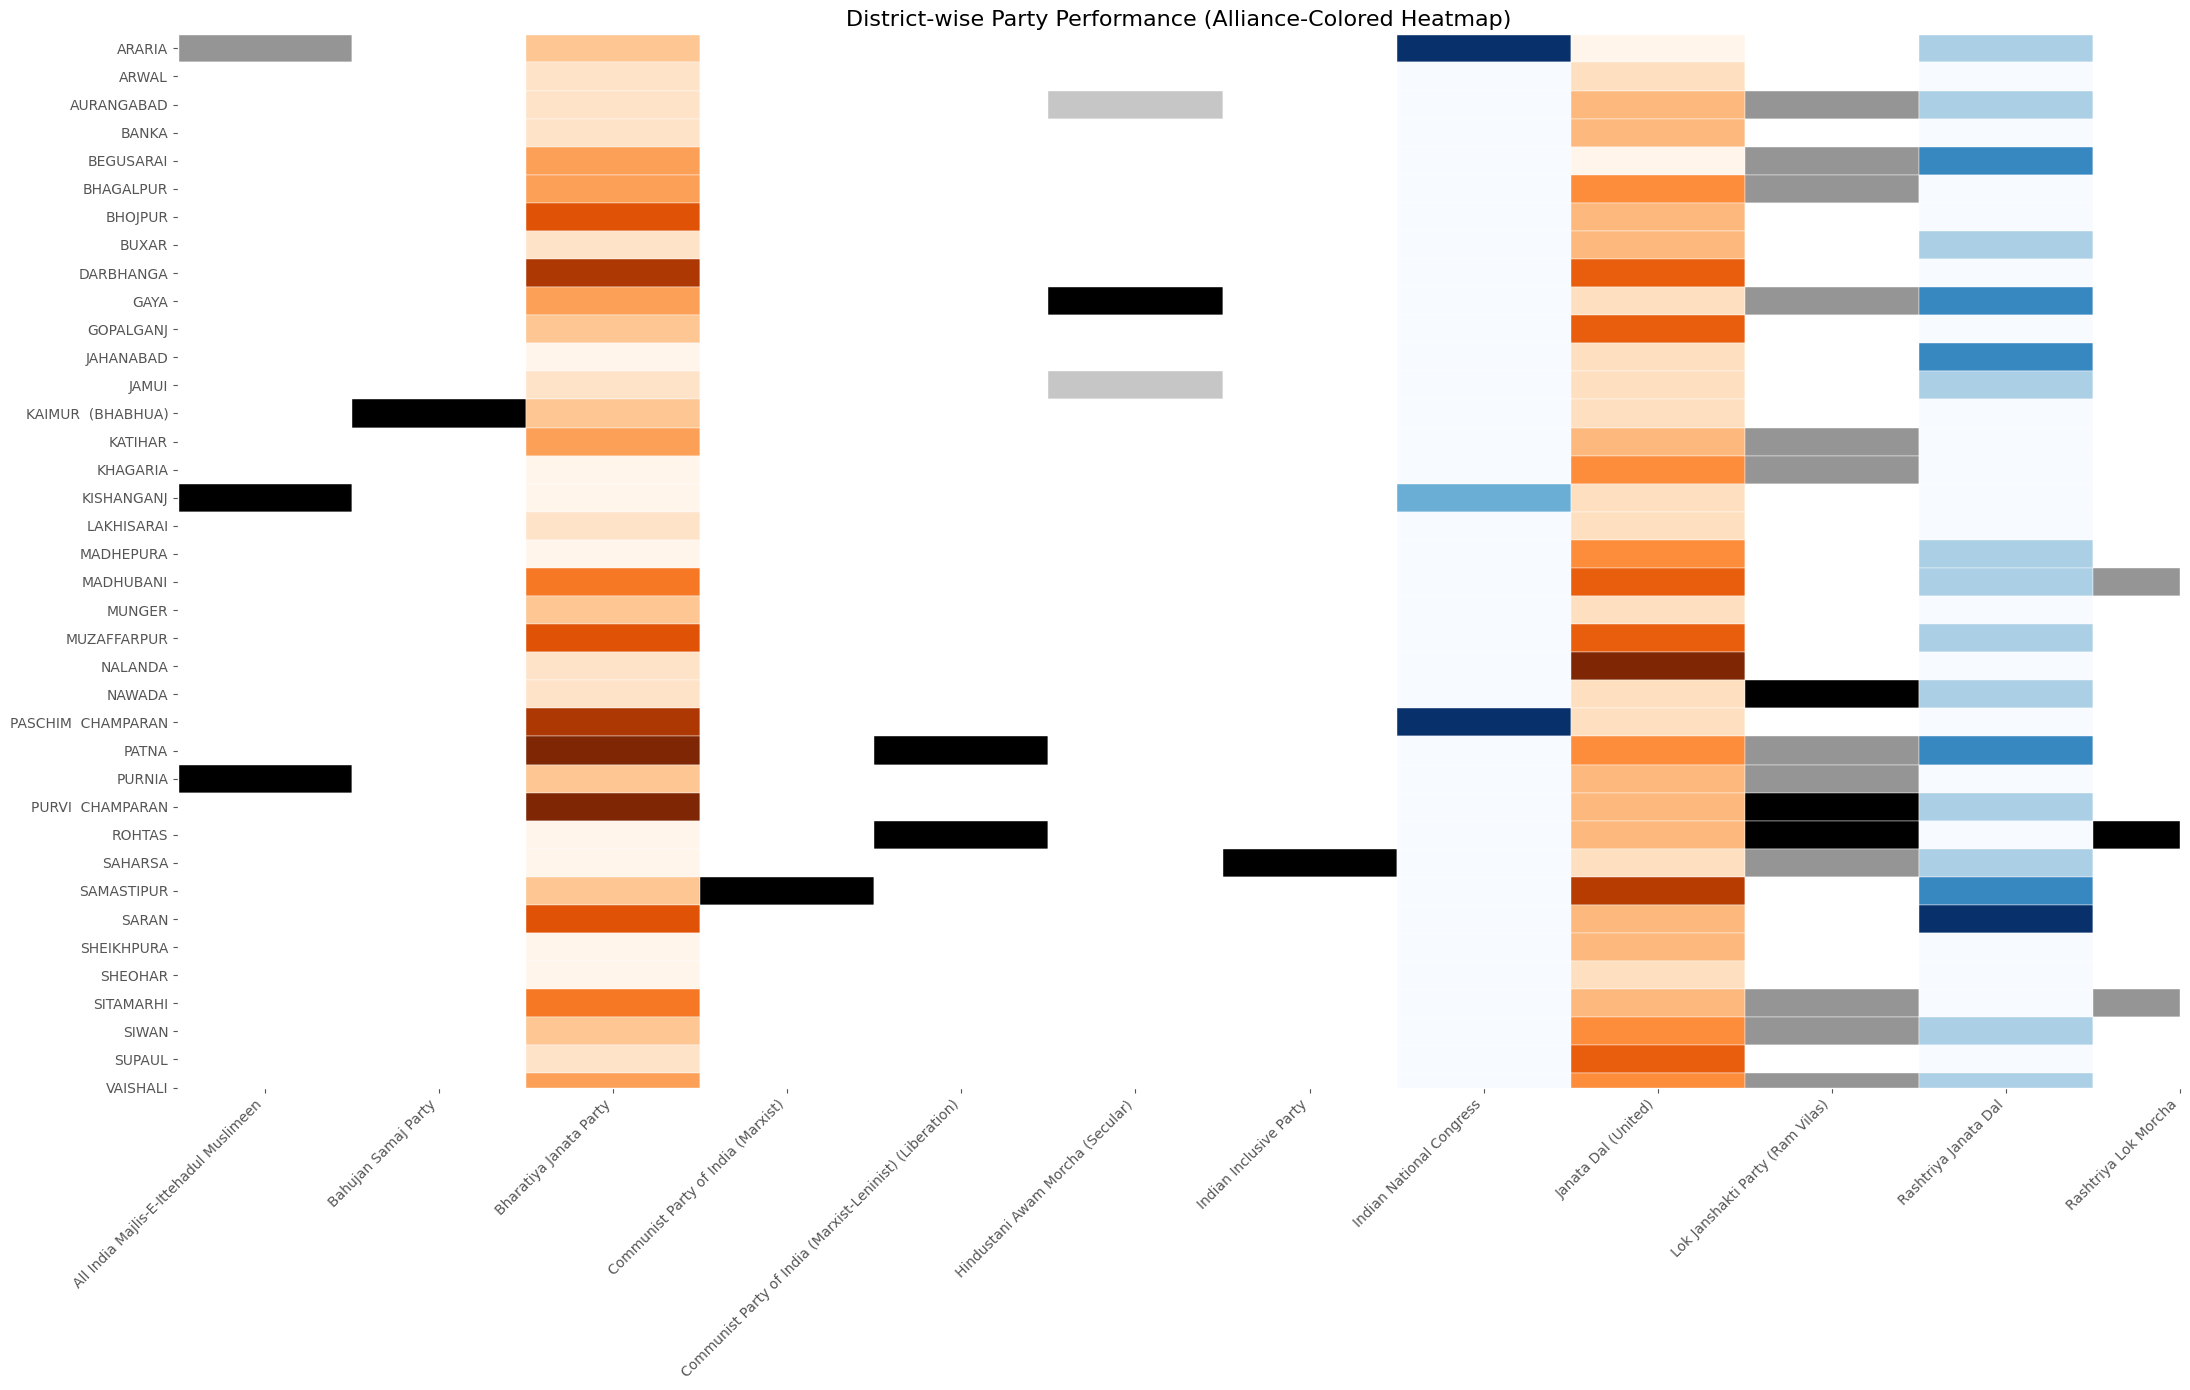

In [73]:

# Prepare top parties
top_parties = party_votes_topN["Party"].tolist()

district_party = (
    master[master["Status"] == "won"]       # only winning candidates
    .groupby(["DISTRICT", "Party"])["AC_NO"]
    .count()
    .rename("Seats_Won")
    .reset_index()
)

district_party_top = district_party[district_party["Party"].isin(top_parties)]

# Pivot table
pivot_heatmap = district_party.pivot(
    index="DISTRICT",
    columns="Party",
    values="Seats_Won"
).fillna(0)

# Alliance color maps
alliance_cmaps = {
    "NDA": plt.cm.Oranges,
    "INDIA": plt.cm.Blues,
    "OTHERS": plt.cm.Greys
}

# Map party → alliance
party_to_alliance = party_votes_topN.set_index("Party")["Alliance"].to_dict()

# Setup figure
fig, ax = plt.subplots(figsize=(22, 14))

# Convert pivot to numpy array
data = pivot_heatmap.values
rows, cols = data.shape

# Plot each column separately
for col_idx, party in enumerate(pivot_heatmap.columns):

    alliance = party_to_alliance.get(party, "OTHERS")
    cmap = alliance_cmaps[alliance]

    # Normalize column values for proper color usage
    col_values = data[:, col_idx]
    norm = plt.Normalize(vmin=col_values.min(), vmax=col_values.max())

    # Create a colored rectangle for each cell
    for row_idx in range(rows):
        ax.add_patch(plt.Rectangle(
            (col_idx, row_idx),
            1, 1,
            facecolor=cmap(norm(col_values[row_idx])),
            edgecolor='white',
            linewidth=0.3
        ))

# Format axes
ax.set_xticks(np.arange(cols) + 0.5)
ax.set_xticklabels(pivot_heatmap.columns, rotation=45, ha='right')

ax.set_yticks(np.arange(rows) + 0.5)
ax.set_yticklabels(pivot_heatmap.index)

ax.invert_yaxis()
plt.title("District-wise Party Performance (Alliance-Colored Heatmap)", fontsize=16)
plt.tight_layout()
plt.show()
fig.savefig("../visuals/party_heat_map.png", dpi=300, bbox_inches="tight")

In [86]:
party_acronyms = {
    "Bharatiya Janata Party": "BJP",
    "Janata Dal (United)": "JDU",
    "Rashtriya Janata Dal": "RJD",
    "Indian National Congress": "INC",
    "Lok Janshakti Party (Ram Vilas)": "LJP(RV)",
    "Hindustani Awam Morcha (Secular)": "HAMS",
    "Communist Party of India (Marxist–Leninist) Liberation": "CPI-ML",
    "All India Majlis-E-Ittehadul Muslimeen": "AIMIM",
    "Bahujan Samaj Party": "BSP",
    "Independent": "IND",
    "Communist Party of India (Marxist-Leninist) (Liberation)":"CPI(ML)",
    "Vikassheel Insaan Party":"VIP",
    "Janshakti Janta Dal":"JJD"
    # Add more if needed
}

def short_name(party):
    if party in party_acronyms:
        return party_acronyms[party]
    else:
        # Automatic fallback: take first letters of each word
        return "".join([w[0] for w in party.split()]).upper()

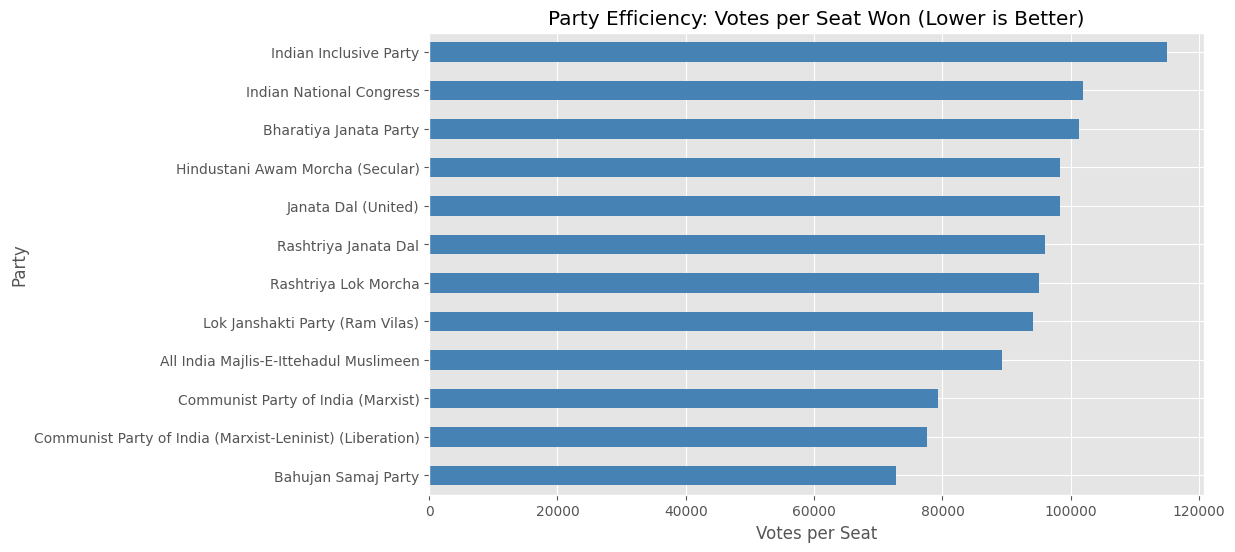

In [98]:
# Party Efficiency (Votes per Seat)
party_eff = (
    master[master["Status"]=="won"]
    .groupby("Party")["Votes"]
    .sum() /
    master[master["Status"]=="won"]
    .groupby("Party")["AC_NO"]
    .count()
)

party_eff = party_eff.sort_values()

party_eff.plot(kind="barh", figsize=(10,6), color="steelblue")
plt.title("Party Efficiency: Votes per Seat Won (Lower is Better)")
plt.xlabel("Votes per Seat")
plt.show()

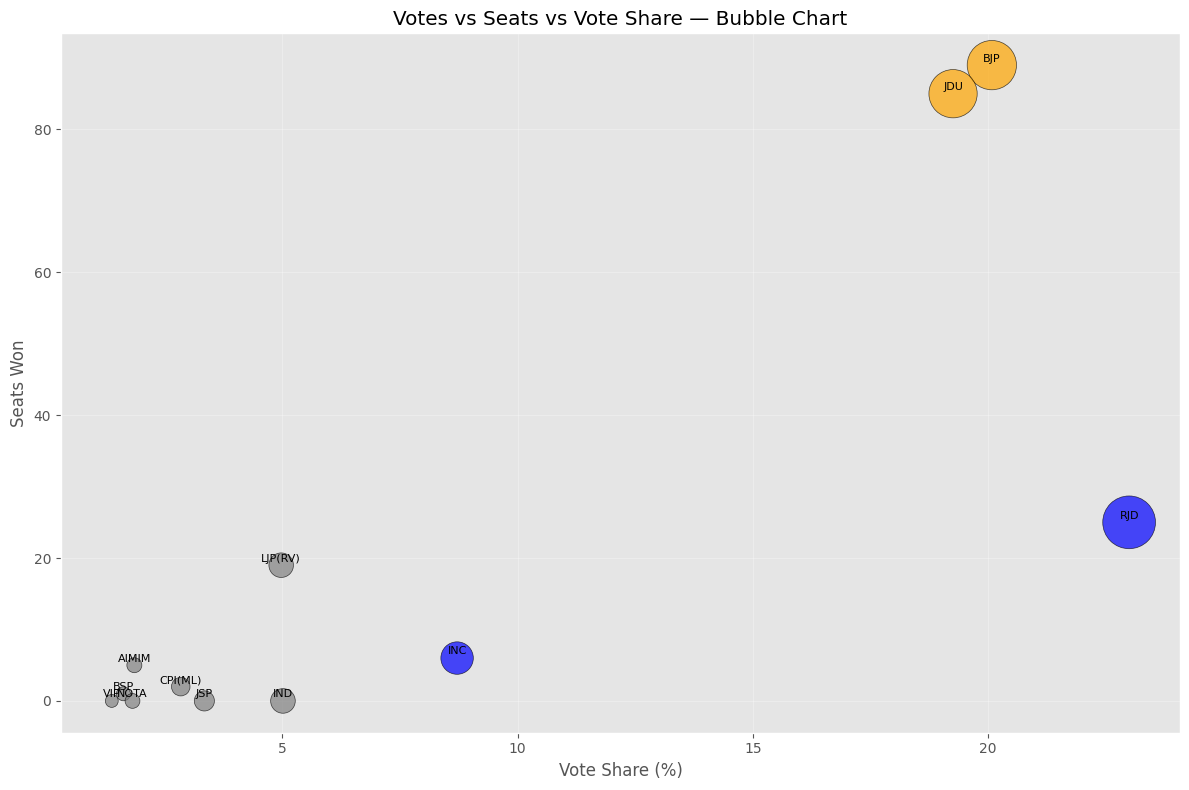

In [109]:
# Bubble Chart

# Prepare party-level dataset
bubble_df = master.groupby("Party").agg({
    "Party_Total_Votes": "max",
    "Party_Vote_Share_%": "max",
    "Party_Seats_Won": "max"
}).reset_index()

bubble_df = bubble_df.merge(
    party_votes_topN[["Party", "Alliance"]],
    on="Party",
    how="left"
)

bubble_df["Alliance"] = bubble_df["Alliance"].fillna("OTHERS")

bubble_df_topN = bubble_df[bubble_df["Party"].isin(top_parties)]

bubble_df_topN = bubble_df_topN.copy()

bubble_df_topN["Party_Label"] = bubble_df_topN["Party"].apply(short_name)

# Colors for alliances
alliance_colors = {
    "NDA": "orange",
    "INDIA": "blue",
    "OTHERS": "gray"
}
bubble_df_topN = bubble_df_topN.copy()

bubble_df_topN["Color"] = bubble_df_topN["Alliance"].map(alliance_colors)

plt.figure(figsize=(12,8))

plt.scatter(
    bubble_df_topN["Party_Vote_Share_%"],
    bubble_df_topN["Party_Seats_Won"],
    s=bubble_df_topN["Party_Total_Votes"] / 8000,   # adjust scale
    c=bubble_df_topN["Color"],
    alpha=0.7,
    edgecolor="black"
)

# Add labels
for _, row in bubble_df_topN.iterrows():
    plt.text(
        row["Party_Vote_Share_%"],
        row["Party_Seats_Won"] + 0.5,
        row["Party_Label"],
        ha="center",
        fontsize=8
    )

plt.xlabel("Vote Share (%)")
plt.ylabel("Seats Won")
plt.title("Votes vs Seats vs Vote Share — Bubble Chart")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [119]:
# District-wise Total Votes (Bar)
district_seats = (
    master[master["Status"]=="won"]
    .groupby("DISTRICT")["AC_NO"]
    .count()
    .sort_values(ascending=False)
)

district_seats.head(15)



DISTRICT
PATNA                 14
PURVI  CHAMPARAN      12
DARBHANGA             10
GAYA                  10
SARAN                 10
SAMASTIPUR            10
MADHUBANI             10
MUZAFFARPUR           10
PASCHIM  CHAMPARAN     9
VAISHALI               8
SITAMARHI              8
BHAGALPUR              7
BHOJPUR                7
NALANDA                7
ROHTAS                 7
Name: AC_NO, dtype: int64

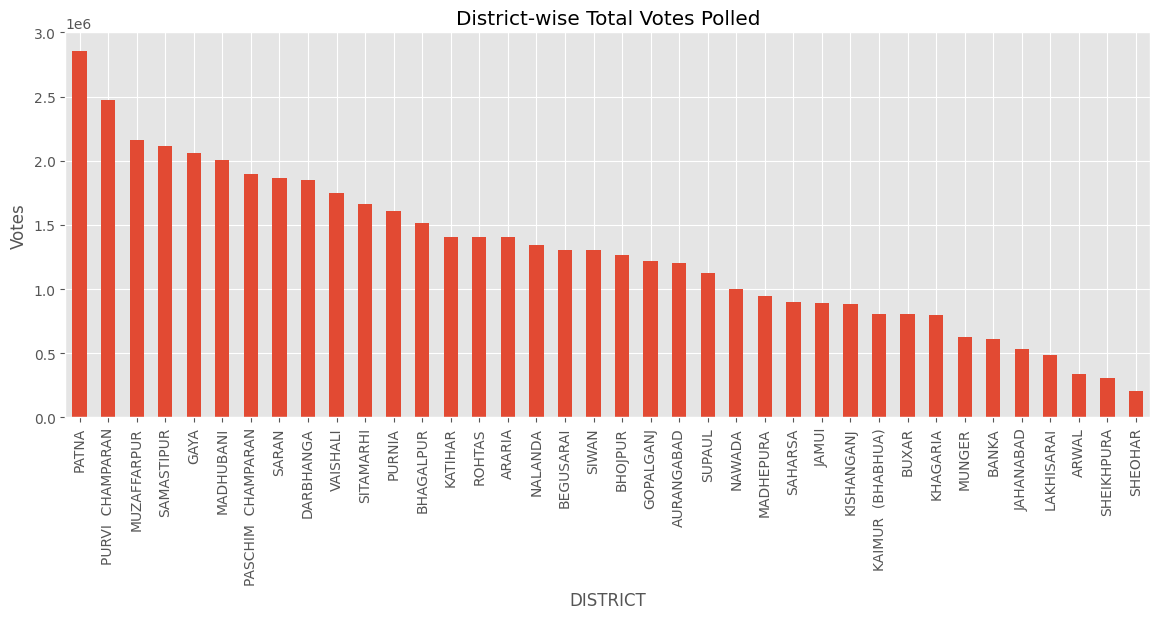

In [128]:
#District Seat Share
district_votes = (
    master.groupby("DISTRICT")["Votes"].sum()
    .sort_values(ascending=False)
)

district_votes.plot(kind="bar", figsize=(14,5))
plt.title("District-wise Total Votes Polled")
plt.ylabel("Votes")
plt.show()

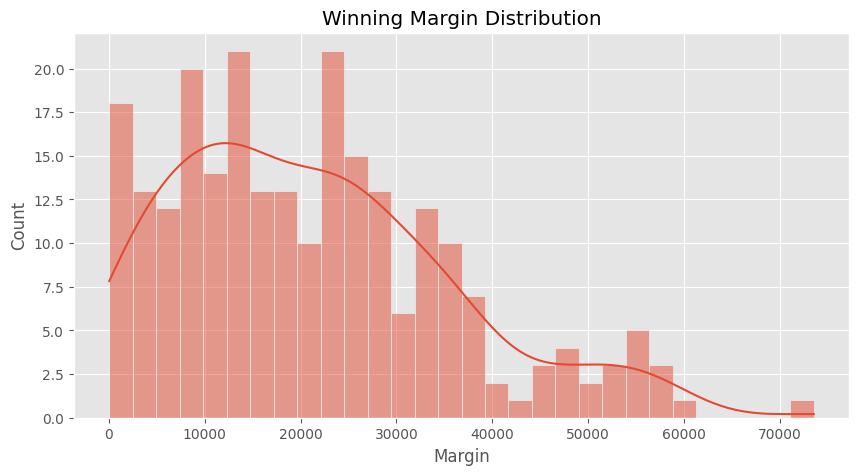

In [136]:
# Winning Margin Distribution
df_winners = master[master["Status"]=="won"]

plt.figure(figsize=(10,5))
sns.histplot(df_winners["Margin"], bins=30, kde=True)
plt.title("Winning Margin Distribution")
plt.xlabel("Margin")
plt.show()

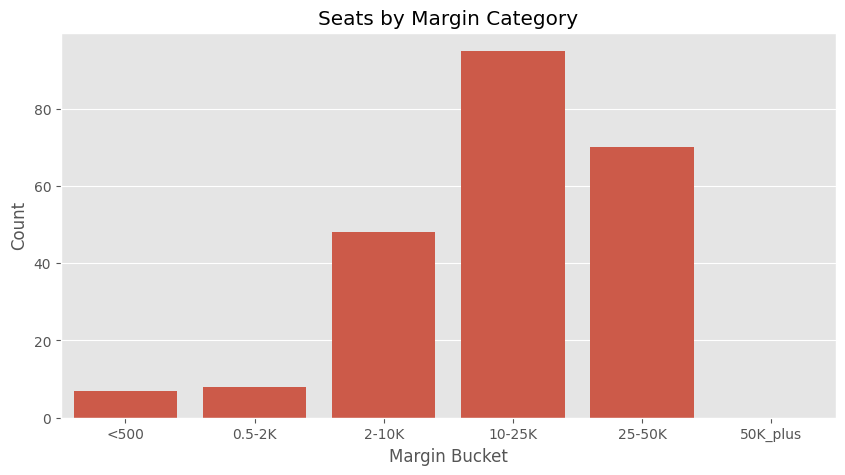

In [143]:
# Seat Safety Categories (Count Plot)
plt.figure(figsize=(10,5))
sns.countplot(data=df_winners, x="Margin_Bucket", order=[
    "<500", "0.5-2K","2-10K","10-25K","25-50K","50K_plus"
])
plt.title("Seats by Margin Category")
plt.xlabel("Margin Bucket")
plt.ylabel("Count")
plt.show()

In [149]:
# Closest & Widest Victories
# full master dataset by AC_NO and Votes descending
ranked = master.sort_values(["AC_NO", "Votes"], ascending=[True, False])

# Take top 2 candidates per constituency
top2 = ranked.groupby("AC_NO").head(2).copy()

# Split winner and runner-up
winners = top2[top2["Status"] == "won"]
runners_up = top2[top2["Status"] != "won"]

winners = winners.merge(
    runners_up[["AC_NO", "Party", "Votes"]],
    on="AC_NO",
    how="left",
    suffixes=("", "_RunnerUp")
)

winners["Party_Acronym"] = winners["Party"].map(party_acronyms).fillna(winners["Party"])
winners["RunnerUp_Acronym"] = winners["Party_RunnerUp"].map(party_acronyms).fillna(winners["Party_RunnerUp"])

closest_15 = winners.nsmallest(
    15, "Margin"
)[["AC_NO", "AC_NAME", "Party_Acronym", "RunnerUp_Acronym", "Margin"]]

widest_15 = winners.nlargest(
    15, "Margin"
)[["AC_NO", "AC_NAME", "Party_Acronym", "RunnerUp_Acronym", "Margin"]]

closest_15, widest_15

(     AC_NO        AC_NAME Party_Acronym RunnerUp_Acronym  Margin
 191    192        Sandesh           JDU              RJD      27
 202    203        Ramgarh           BSP              BJP      30
 194    195         Agiaon           BJP          CPI(ML)      95
 220    221      Nabinagar           JDU              RJD     112
 20      21          Dhaka           RJD              BJP     178
 47      48     Forbesganj           INC              BJP     221
 64      65      Balrampur       LJP(RV)            AIMIM     389
 6        7      Chanpatia           INC              BJP     602
 215    216      Jehanabad           RJD              JDU     793
 228    229      Bodh Gaya           RJD          LJP(RV)     881
 179    180    Bakhtiarpur       LJP(RV)              RJD     981
 115    116        Taraiya           BJP              RJD    1329
 11      12       Narkatia           JDU              RJD    1443
 0        1  Valmiki Nagar           INC              JDU    1675
 217    21

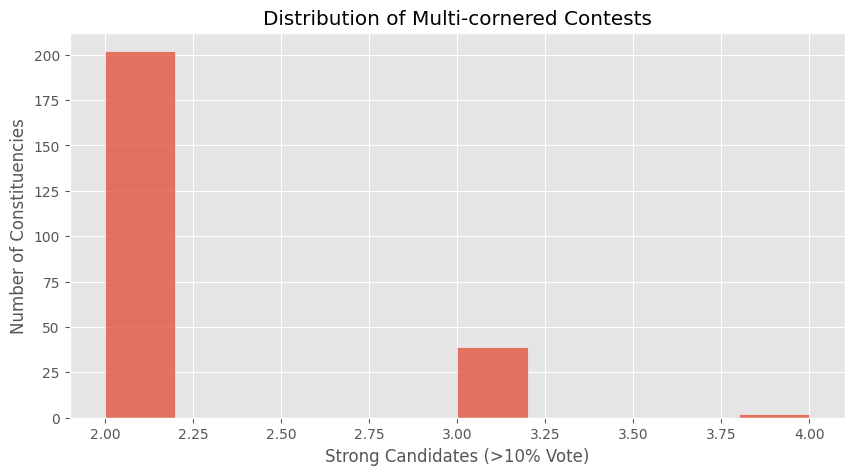

In [154]:
# Multi Cornered Contests
plt.figure(figsize=(10,5))
sns.histplot(master["Multi_Cornered_Count"], bins=10, kde=False)
plt.title("Distribution of Multi-cornered Contests")
plt.xlabel("Strong Candidates (>10% Vote)")
plt.ylabel("Number of Constituencies")
plt.show()

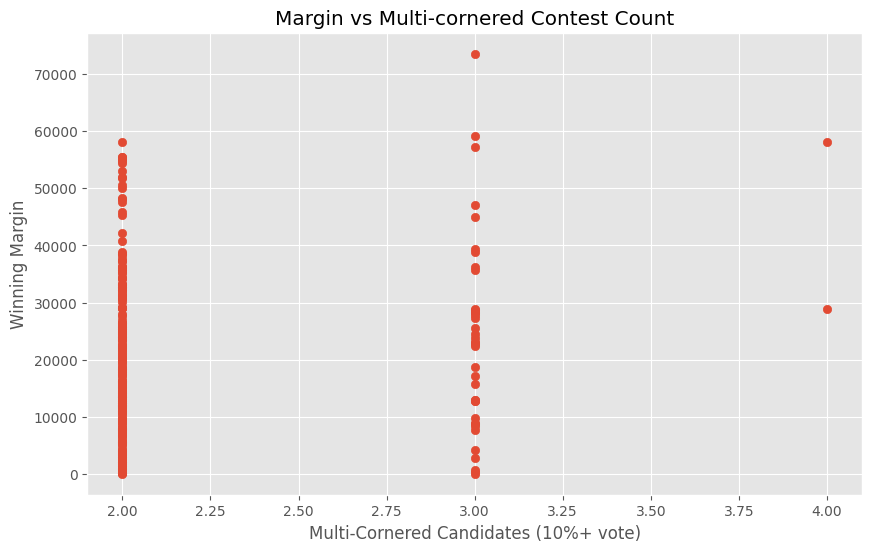

In [158]:
# Multi-Cornered vs Margin (Scatter Plot)
plt.figure(figsize=(10,6))
plt.scatter(df_winners["Multi_Cornered_Count"], df_winners["Margin"])
plt.title("Margin vs Multi-cornered Contest Count")
plt.xlabel("Multi-Cornered Candidates (10%+ vote)")
plt.ylabel("Winning Margin")
plt.show()

In [161]:
# Margin Vs Total Votes
import plotly.express as px

fig = px.scatter(
    df_winners,
    x="Total_Votes_Polled",
    y="Margin",
    color="Party",
    hover_data=["AC_NO","AC_NAME","Candidate"],
    title="Margin vs Total Votes Polled (Interactive)"
)

fig.show()

In [171]:
#Data preparation to study the impact of Jan Suraj Party
df = master.copy()

# Label alliances
df["Alliance"] = df["Party"].map(alliance_map).fillna("OTHERS")

# Winners + runner-up extraction
winners = df[df["Status"] == "won"]
runnerups = (
    df[df["Status"] == "lost"]
    .sort_values(["AC_NO", "Votes"], ascending=[True, False])
    .groupby("AC_NO")
    .head(1)
)

# Merge winner + runner-up
race = winners.merge(
    runnerups,
    on="AC_NO",
    suffixes=("_win", "_ru")
)

# Merge Jan Suraj votes
js_votes = df[df["Party"] == "Jan Suraaj Party"][["AC_NO", "Votes"]].rename(columns={"Votes": "JS_Votes"})

race = race.merge(js_votes, on="AC_NO", how="left")
race["JS_Votes"] = race["JS_Votes"].fillna(0)

race.head(10)

,AC_NO,AC_NAME_win,Candidate_win,Party_win,Votes_win,Margin_win,Status_win,Total_Votes_Polled_win,DISTRICT_win,GENERAL_SC_win,...,Party_Vote_Share_%_ru,Party_Constituencies_Contested_ru,Party_Seats_Won_ru,Party_Conversion_Percentage_ru,Wasted_Votes_ru,Effective_Votes_ru,Votes_per_Seat_ru,Seats_Won_ru,Alliance_ru,JS_Votes
0,1,Valmiki Nagar,SURENDRA PRASAD,Indian National Congress,107730,1675,won,233632,PASCHIM CHAMPARAN,GENERAL,...,19.254241,101,85,84.16,106055,0,1.137308e+05,85,NDA,0.0
1,2,Ramnagar,NAND KISHOR RAM,Bharatiya Janata Party,115214,35680,won,212859,PASCHIM CHAMPARAN,SC,...,22.996567,143,25,17.48,79534,0,4.618422e+05,25,INDIA,6992.0
2,3,Narkatiaganj,SANJAY KUMAR PANDEY,Bharatiya Janata Party,100044,26458,won,196691,PASCHIM CHAMPARAN,GENERAL,...,22.996567,143,25,17.48,73586,0,4.618422e+05,25,INDIA,4238.0
3,4,Bagaha,RAM SINGH,Bharatiya Janata Party,106875,6313,won,225532,PASCHIM CHAMPARAN,GENERAL,...,8.712959,61,6,9.84,100562,0,7.290965e+05,6,INDIA,5799.0
4,5,Lauriya,VINAY BIHARI,Bharatiya Janata Party,96510,26966,won,191647,PASCHIM CHAMPARAN,GENERAL,...,1.373263,12,0,0.00,69544,0,inf,0,OTHERS,15722.0
5,6,Nautan,NARAYAN PRASAD,Bharatiya Janata Party,101952,22072,won,207833,PASCHIM CHAMPARAN,GENERAL,...,8.712959,61,6,9.84,79880,0,7.290965e+05,6,INDIA,12082.0
6,7,Chanpatia,ABHISHEK RANJAN,Indian National Congress,87538,602,won,218455,PASCHIM CHAMPARAN,GENERAL,...,20.078865,101,89,88.12,86936,0,1.132713e+05,89,NDA,37172.0
7,8,Bettiah,RENU DEVI,Bharatiya Janata Party,91907,22373,won,196464,PASCHIM CHAMPARAN,GENERAL,...,8.712959,61,6,9.84,69534,0,7.290965e+05,6,INDIA,6297.0
8,9,Sikta,SAMMRIDH VARMA,Janata Dal (United),97173,47144,won,210762,PASCHIM CHAMPARAN,GENERAL,...,5.011772,232,0,0.00,50029,0,inf,0,OTHERS,8181.0
9,10,Raxaul,PRAMOD KUMAR SINHA,Bharatiya Janata Party,106765,17878,won,215448,PURVI CHAMPARAN,GENERAL,...,8.712959,61,6,9.84,88887,0,7.290965e+05,6,INDIA,14656.0


In [ ]:
#Calculating the Spoileers by Jan Suraj Party
race["JS_Spoiler"] = race["JS_Votes"] > race["Margin_win"]
spoiler_cases = race[race["JS_Spoiler"] == True]
spoiler_cases.shape


In [194]:
#Extracting only certain columns from the spoiler_cases dataframe
required_cols = [
    "AC_NO",
    "AC_NAME_win",
    "DISTRICT_win",
    "GENERAL_SC_win",
    "Candidate_win",
    "Party_win",
    "Votes_win",
    'Alliance_win',
    "Margin_win",
    "Status_win",
    "Vote_Percent_win",
    "Total_Votes_Polled_win",
    
    "Candidate_ru",
    "Party_ru",
    "Votes_ru",
    "Vote_Percent_ru",
    "Alliance_ru",

    "JS_Votes"
]

In [211]:
spoiler_cases_clean = spoiler_cases[required_cols].copy()
spoiler_cases_clean.sort_values("Margin_win", ascending=True,inplace=True)
spoiler_cases_clean.to_csv("../data/processed/Bihar2025_Jan_Suraaj_Impacted_Parties.csv", index=False)

In [ ]:
#Jan Suraaj Party spoiler detailing the impact on alliance
spoiler_cases_clean ["Harmed_Alliance"] = spoiler_cases_clean ["Alliance_ru"].copy()
impact_summary = (
    spoiler_cases_clean ["Harmed_Alliance"]
    .value_counts()
    .reset_index()
)
# 3. Correct renaming
impact_summary.columns = ["Alliance", "Seats_Harmed"]

alliance_colors = {
    "NDA": "#FF8C00",       # Orange
    "INDIA": "#1E90FF",       # Blue
    "OTHERS": "#808080"     # Grey
}
impact_summary["Color"] = impact_summary["Alliance"].map(alliance_colors)
impact_summary

,Alliance,Seats_Harmed,Color
0,INDIA,15,NaN
1,NDA,11,#FF8C00
2,OTHERS,9,#808080


ValueError: 'facecolor' or 'color' argument must be a valid color or sequence of colors.

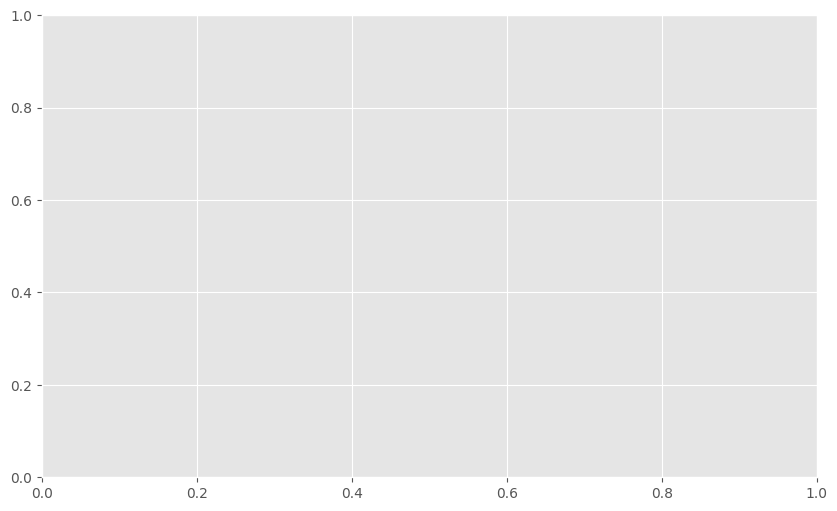

In [218]:
#Plotting the impact summary of JAn Suraaj
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bars = plt.bar(
    impact_summary["Alliance"],
    impact_summary["Seats_Harmed"],
    color=impact_summary["Color"],
    edgecolor="black"
)

# Add numbers on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.3,
        f"{int(height)}",
        ha="center",
        fontsize=12,
        fontweight="bold"
    )

plt.title("Impact of Jan Suraaj on Alliances (Seats Potentially Lost)", fontsize=16)
plt.xlabel("Alliance", fontsize=14)
plt.ylabel("Seats Harmed Due to Vote Splitting", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()